<a href="https://colab.research.google.com/github/makhijakabir/machine-learning/blob/main/multivariateRegressionBHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the House Prices in Boston using Multivariate Regression.

In [37]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#This is written so that our charts show up whenever we export our notebook.

##Gathering and Organising the Data

In [51]:
bostonDataset = load_boston()

#Use the dir function in python to get all the available attributes of any dataset
dir(bostonDataset)

#The DESC attribute return the complete description of the dataset
print(bostonDataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
#This returns all the available attributes of the Boston Dataset
#The actual price attribute is not here because it is stored in the target part of the BUNCH datatype
bostonDataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [53]:
#This target returns the actual house prices in orger of 10^3 i.e. thousands. 24. = $24,000
bostonDataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

##Data Exploration with Pandas Dataframe

In [16]:
#This creates a pandas dataframe with our data from the Boston House Prices datset
data = pd.DataFrame(data=bostonDataset.data, columns=bostonDataset.feature_names)

#To add the actual prices (the target attribute) we need to add another column to the dataframe
data['PRICE'] = bostonDataset.target

In [17]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
#Various methods offered by the PANDAS

data.head() #returns the first 5 rows/instances of the datframe
data.tail() #returns the last 5 rows/instances of the dataframe
data.count() #returns the number of rows/instances present in each column/feature in the complete datset


CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

##Visualising Data through Histograms, Distributions, and Bar Charts.

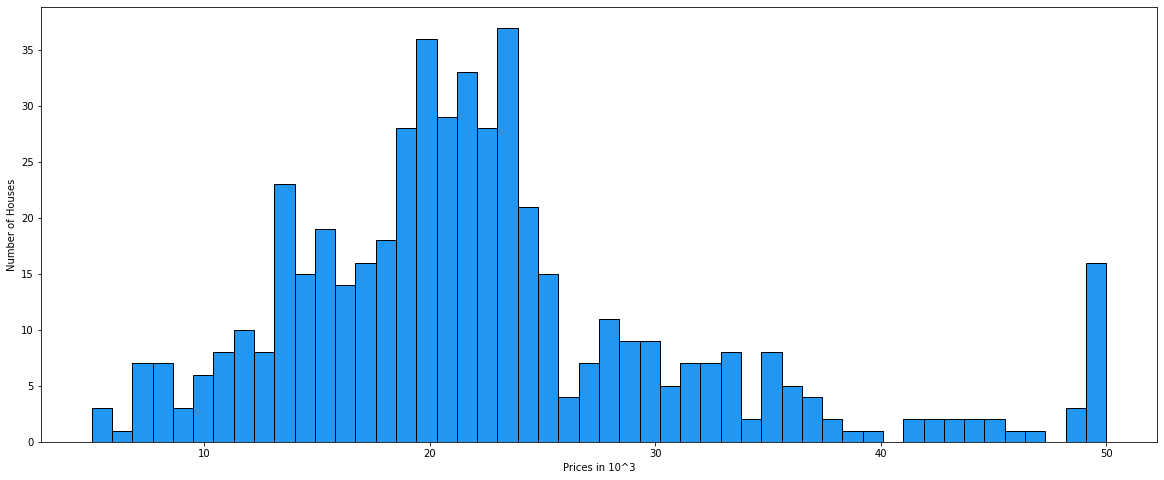

In [50]:
#This is by using MATPLOTLIB for the PRICES attribute of the houses

plt.figure(figsize=(20, 8))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Prices in 10^3')
plt.ylabel('Number of Houses')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


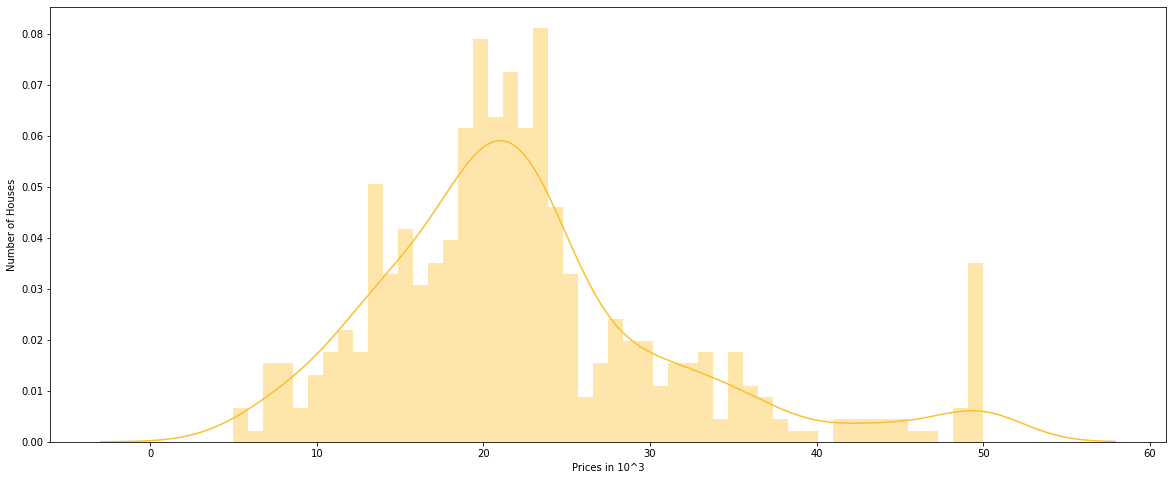

In [57]:
 #This is by using SEABORN and returns the prices of the houses

plt.figure(figsize=(20, 8))
sns.distplot(data['PRICE'], bins=50, color='#FBC02D')
plt.xlabel('Prices in 10^3')
plt.ylabel('Number of Houses')
plt.show()

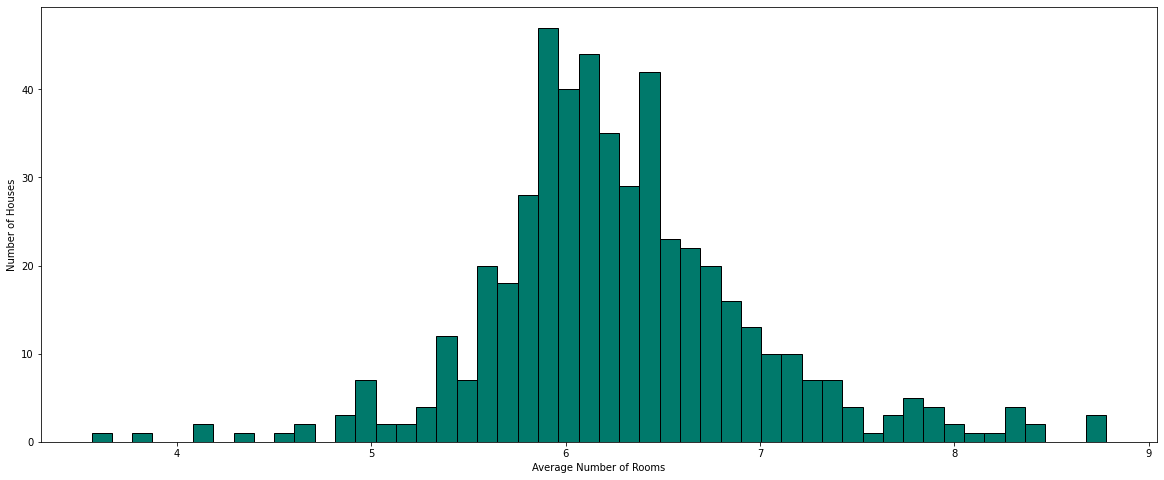

In [65]:
#This is by using MATPLOTLIB for the RM (number of rooms) attribute of the houses

plt.figure(figsize=(20, 8))
plt.hist(data['RM'], bins=50, ec='black', color='#00796B')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Houses')
plt.show()

In [60]:
#To check the average number of rooms in Boston Houses

data['RM'].mean()

6.284634387351787

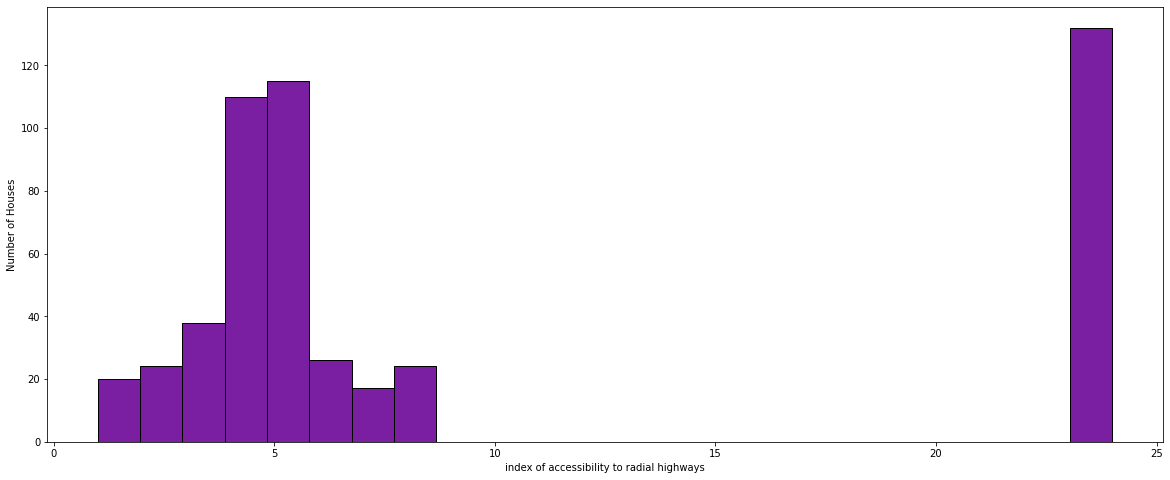

In [70]:
#This is by using MATPLOTLIB for the RAD (index of accessibility to radial highways) attribute of the houses

plt.figure(figsize=(20, 8))
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2')
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('Number of Houses')
plt.show()

In [75]:
#To check how many houses are actually placed near the charles river

data['CHAS'].value_counts() #Chas is a dummy variable where 1 says near the river and 0 says far from the river

0.0    471
1.0     35
Name: CHAS, dtype: int64